# 이미지 1개 pretrained weight 통해 예측하기
## VGG16, MobileNet, Inception, ResNet50
## numpy array (n,h,w,c) 형태로 이미지 바꿔줘야함

In [1]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [2]:
# import the required image preprocessing functions 
import cv2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions

# import the models for further classification experiments
from tensorflow.keras.applications import (
        vgg16,
        resnet,
        mobilenet,
        inception_v3
    )

import matplotlib.pyplot as plt
import numpy as np

# imports for reproducibility
import tensorflow as tf
import random
import os

%matplotlib inline

In [3]:
# settings for reproducibility
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [4]:
# init the models
vgg_model = vgg16.VGG16(weights='imagenet')

In [5]:
inception_model = inception_v3.InceptionV3(weights='imagenet')

96116736/96112376 [==============================] - 6s 0us/step


In [6]:
resnet_model = resnet.ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 7s 0us/step


In [7]:
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

17227776/17225924 [==============================] - 1s 0us/step


In [8]:
# assign the image path for the classification experiments
filename = 'D:/파이썬딥러닝/20201124 UST transfer and reinforcement learning/pretrained-imagenet-models-classification/cat.jpg'

PIL image size (224, 224)


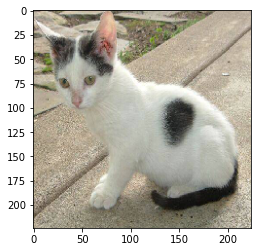

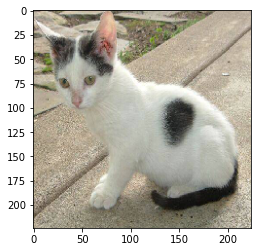

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


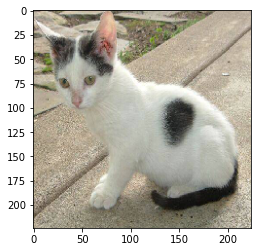

In [9]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [10]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# we will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
# print VGG16 predictions
for prediction_id in range(len(label_vgg[0])):
    print(label_vgg[0][prediction_id])

('n02123597', 'Siamese_cat', 0.3093419)
('n01877812', 'wallaby', 0.080341235)
('n02326432', 'hare', 0.075098425)
('n02325366', 'wood_rabbit', 0.05053069)
('n03223299', 'doormat', 0.04817361)


In [11]:
# prepare the image for the ResNet50 model
processed_image = resnet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
# print ResNet predictions
for prediction_id in range(len(label_resnet[0])):
    print(label_resnet[0][prediction_id])

('n02124075', 'Egyptian_cat', 0.15737624)
('n03958227', 'plastic_bag', 0.14362872)
('n03223299', 'doormat', 0.14099436)


In [12]:
# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
# print MobileNet predictions
for prediction_id in range(len(label_mobilenet[0])):
    print(label_mobilenet[0][prediction_id])

('n03958227', 'plastic_bag', 0.1570368)
('n02124075', 'Egyptian_cat', 0.1169736)
('n02123597', 'Siamese_cat', 0.10532721)
('n02123045', 'tabby', 0.07564847)
('n02909870', 'bucket', 0.054681484)


In [13]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
# print Inception predictions
for prediction_id in range(len(label_inception[0])):
    print(label_inception[0][prediction_id])

('n02124075', 'Egyptian_cat', 0.6622575)
('n02123045', 'tabby', 0.050285123)
('n02123597', 'Siamese_cat', 0.036381565)
('n02123159', 'tiger_cat', 0.023522455)
('n03223299', 'doormat', 0.015205731)


In [14]:
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

# format final image visualization to display the results of experiments
cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
numpy_image = cv2.resize(numpy_image, (700,700))
cv2.imwrite("images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

False

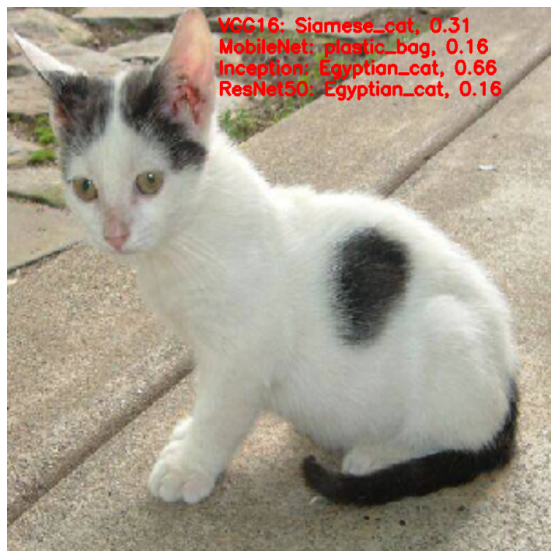

In [15]:
plt.figure(figsize=[10,10])
plt.axis('off')
plt.imshow(numpy_image)